**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick
!pip install --upgrade scikit-learn
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pickle
with open('/content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
# modelo = DecisionTreeClassifier(criterion='entropy')
modelo = DecisionTreeClassifier(random_state=42)

# Encode target variable
le = LabelEncoder()
y_treino_encoded = le.fit_transform(y_treino)
y_teste_encoded = le.transform(y_teste)


# Espaço de busca (hiperparâmetros de teste)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (2, 20),          # de 2 até 20
    'min_samples_leaf': (1, 20),   # de 1 até 20
    'min_samples_split': (2, 20)   # de 2 até 20
}

# Otimização Bayesiana
opt = BayesSearchCV(
    modelo,
    param_grid,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='f1'
)

# Treinamento
opt.fit(X_treino, y_treino_encoded)

print("Melhor score de validação:", opt.best_score_)
print("Score no teste:", opt.score(X_teste, y_teste_encoded))
print("Melhores parâmetros:", opt.best_params_)

Melhor score de validação: 0.7427215843716176
Score no teste: 0.7761194029850746
Melhores parâmetros: OrderedDict({'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 10})


In [ ]:
modelo_controlado = DecisionTreeClassifier(
    criterion='gini',
    max_depth=19,              # Limita a profundidade a 5 níveis
    min_samples_leaf=3,       # Cada folha deve ter no mínimo 5 pessoas
    min_samples_split= 10,
    random_state=42           # Garante que o resultado seja o mesmo toda vez
)

# treinamento com o novo modelo
modelo_controlado.fit(X_treino, y_treino)

,criterion,'gini'
,splitter,'best'
,max_depth,19
,min_samples_split,10
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None




> **Vamos testar o modelo?**



In [ ]:
previsoes = modelo_controlado.predict(X_teste)

In [ ]:
previsoes

array(['nao morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu',
       'nao morreu', 'nao morreu', 'morreu', 'morreu', 'nao morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu',
       'morreu', 'nao morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'nao morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'nao morreu', 'morreu', 'nao morreu',
       'morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'morreu', 'morreu',
       'morreu', 'morreu', 'morreu', 'morreu', 'nao morreu', 'nao morreu',
       'morreu', 'nao morreu', 'morreu', 'nao morreu', 'morreu',
       'nao morreu', 'nao morreu', 'nao morreu', 'morreu', 'nao morreu',
       'nao morreu', 'morreu', 'morreu', 'nao morreu', 'morreu', 'morreu',
       'morreu', 'nao morreu', 'nao morreu', 'nao morreu', 'morreu',
       'nao morreu', 'morreu', 'morreu', 'morreu', 'nao morreu',
       'na



> **Será se o modelo acertou?**



In [ ]:
y_teste

,Survived
709,nao morreu
439,morreu
840,morreu
720,nao morreu
39,nao morreu
...,...
433,morreu
773,morreu
25,nao morreu
84,nao morreu


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8324022346368715

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[97,  8],
       [22, 52]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8324022346368715

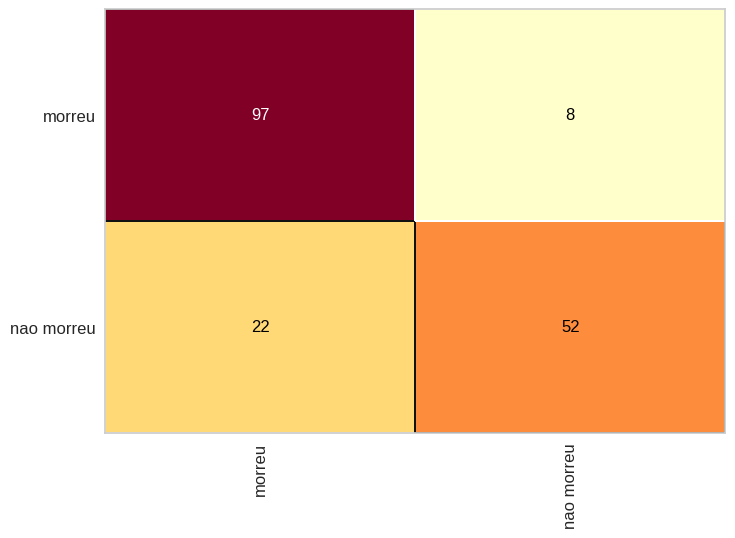

In [ ]:
cm = ConfusionMatrix(modelo_controlado)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

      morreu       0.82      0.92      0.87       105
  nao morreu       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179



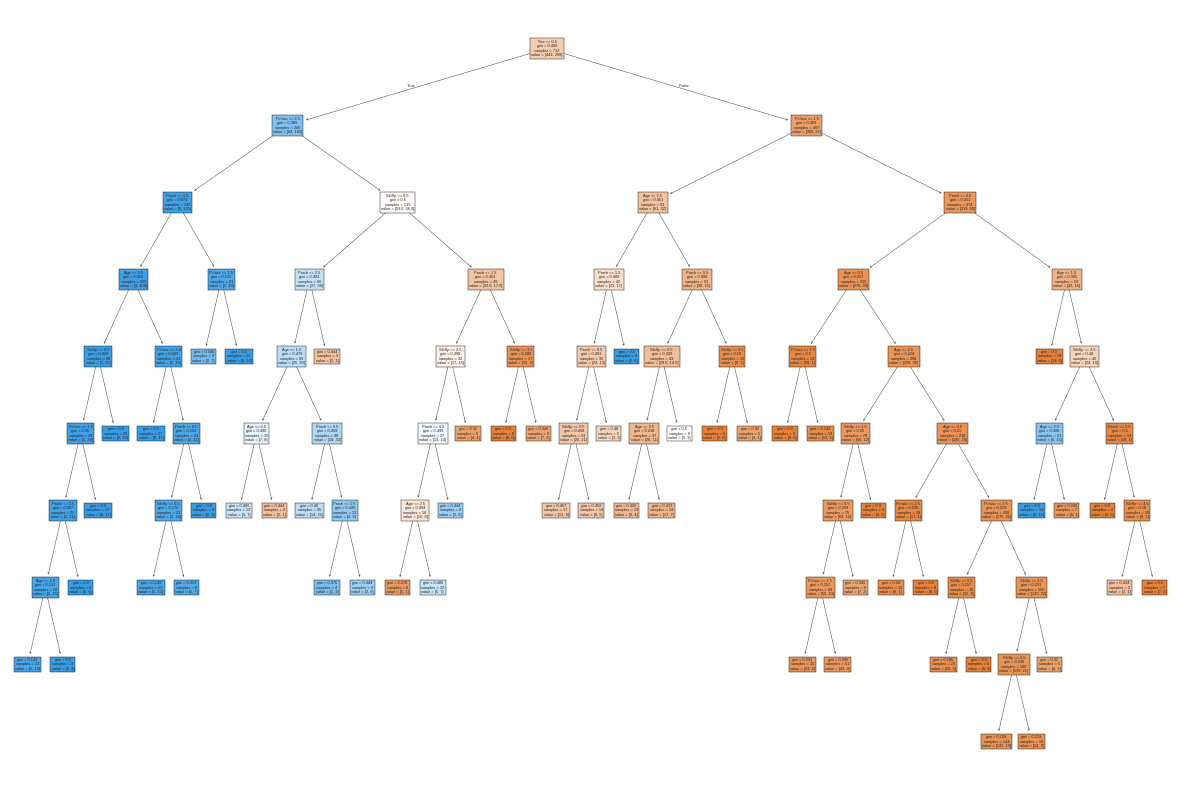

In [ ]:
from sklearn import tree
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

tree.plot_tree(
    modelo_controlado,
    feature_names=previsores,
    filled=True
);